# HW2

Data https://drive.google.com/file/d/13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu/view?usp=sharing

Cards outliers https://docs.google.com/spreadsheets/d/1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM/edit?usp=sharing

### Task

- Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if a bunch of money is going to spend)
- Prove that the frequency of shopping grows around the wage taking days (1-6 days of each month, 20 -26 days of each month)
- Define such cohort existence:
    - Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
    - Average purchase sum - The customers that usually spend the same amount of money 
    - Usual cart - The customers grouped by the product groups

Create a pull request by using a format hw2;lastname;firstname

### Data 
The raw dataset consists of 9 different columns:

- date - is the timestamp when the purchase was done
- id_doc - receipt's id
- id_order - is the order's id. Order's id is equal to 0 when the purchase was done offline, otherwise online.
- id_card - is the unique id of customer.
- id_tov - is the unique id of product's id
- id_kontr - distributor's id
- quantity - the amount of the same product in receipt which was purchased
- sum - price of the product
- is_green - shows that product is under discount or not

In [1]:
!pip install openpyxl

In [2]:
from scipy.stats import binom_test, ttest_ind
from sklearn.preprocessing import LabelEncoder
from pathlib import Path


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc
import pickle
import bz2

In [3]:
ls data

09_prepared.pkl.bz2  11_prepared.pkl.bz2  hw2/
10_prepared.pkl.bz2  bad_ids.xlsx         inno_stats.tar.gz


In [4]:
!mkdir ./data/hw2 
!tar -xf data/inno_stats.tar.gz -C ./data/hw2

mkdir: ./data/hw2: File exists


In [5]:
data_path = Path('./data/hw2').resolve()
! ls {data_path}

09_groups.csv      10_groups.csv      11_groups.csv      product_groups.csv


In [6]:
g9 = pd.read_csv(f'{str(data_path)}/09_groups.csv')
g9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [7]:
g10 = pd.read_csv(f'{str(data_path)}/10_groups.csv')
g10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-10-01 20:22:55,2035558,0.0,1636749,52,339,1.0,107.90,0,10004
1,2020-10-01 20:54:12,13037327,0.0,267261,52,339,1.0,80.04,0,10004
2,2020-10-01 21:25:59,1430590,0.0,1331395,61,379,1.0,31.92,1,10091
3,2020-10-01 13:31:01,3504660,0.0,641525,61,97,1.0,55.98,0,10091
4,2020-10-01 16:32:06,11024438,0.0,1325852,61,97,4.0,176.00,0,10091


In [8]:
g11 = pd.read_csv(f'{str(data_path)}/11_groups.csv')
g11.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-11-01 15:29:01,3121751,0.0,332351,52,271,1.0,107.98,0,10004
1,2020-11-01 12:41:10,22047017,8293317.0,1875438,52,-9999,1.0,108.00,0,10004
2,2020-11-01 13:17:09,6419825,0.0,563112,61,379,2.0,112.00,0,10091
3,2020-11-01 12:31:31,10284541,0.0,1841710,61,379,1.0,55.91,0,10091
4,2020-11-01 13:06:15,10424967,0.0,1304277,61,271,2.0,87.80,0,10091


In [9]:
pg = pd.read_csv(f'{str(data_path)}/product_groups.csv', delimiter=';', encoding='windows-1251')
pg.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [10]:
bad_ids = pd.read_excel('./data/bad_ids.xlsx')
bad_ids.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

Propose a null hypothesis (rejecting it would prove the task statement):

**H_0**: overall share of discounted goods is INDEPENDENT on the average order sum.

[      0       1       2 ... 6904822 6904823 6904824]


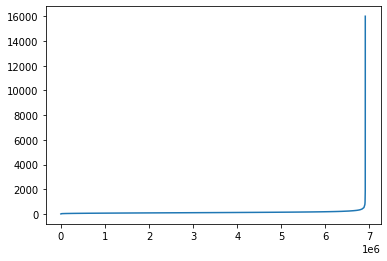

In [31]:
df = g9
df = df[~df.id_card.isin(bad_ids.id_card.values)]

avg_sum = df.groupby('id_doc')['sum'].mean().sort_values()

print(np.arange(len(avg_sum)))
plt.plot(np.arange(len(avg_sum)), avg_sum)
plt.show()

[      0       1       2 ... 6834374 6834375 6834376]


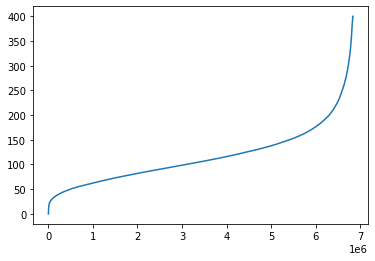

In [32]:
left_avg_sum = avg_sum[avg_sum<=400]

print(np.arange(len(left_avg_sum)))
plt.plot(np.arange(len(left_avg_sum)), left_avg_sum)
plt.show()

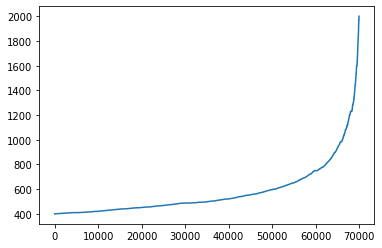

In [33]:
mid_avg_sum = avg_sum[avg_sum<=2000][avg_sum>400]

plt.plot(np.arange(len(mid_avg_sum)), mid_avg_sum)
plt.show()

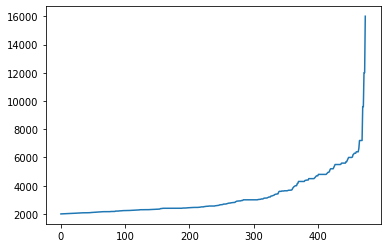

In [34]:
right_avg_sum = avg_sum[avg_sum>2000]

plt.plot(np.arange(len(right_avg_sum)), right_avg_sum)
plt.show()

In [35]:
gm = df.groupby('id_doc')['is_green'].mean()
cm = df[df['id_doc'].isin(left_avg_sum.index)].groupby('id_doc')['is_green'].mean()
mm = df[df['id_doc'].isin(mid_avg_sum.index)].groupby('id_doc')['is_green'].mean()
em = df[df['id_doc'].isin(right_avg_sum.index)].groupby('id_doc')['is_green'].mean()

print(f'Global                     checks show average share of discount products of {gm.mean()}')
print(f'Cheap     (     sum<=400 ) checks show average share of discount products of {cm.mean()}')
print(f'Middle    ( 400<sum<=2000) checks show average share of discount products of {mm.mean()}')
print(f'Expensive (2000<sum      ) checks show average share of discount products of {em.mean()}')

pc = binom_test(cm.sum(), len(cm), p=gm.mean())
pm = binom_test(mm.sum(), len(mm), p=gm.mean())
pe = binom_test(em.sum(), len(em), p=gm.mean())

print(f'Cheap     (     sum<=400 ) checks show P-value of coming from the global distribution: {pc.mean()}')
print(f'Middle    ( 400<sum<=2000) checks show P-value of coming from the global distribution: {pm.mean()}')
print(f'Expensive (2000<sum      ) checks show P-value of coming from the global distribution: {pe.mean()}')

Global                     checks show average share of discount products of 0.07669907979470408
Cheap     (     sum<=400 ) checks show average share of discount products of 0.0773528479054006
Middle    ( 400<sum<=2000) checks show average share of discount products of 0.013300830810441661
Expensive (2000<sum      ) checks show average share of discount products of 0.009473684210526316
Cheap     (     sum<=400 ) checks show P-value of coming from the global distribution: 1.4195611006105082e-10
Middle    ( 400<sum<=2000) checks show P-value of coming from the global distribution: 5e-324
Expensive (2000<sum      ) checks show P-value of coming from the global distribution: 9.222071549462847e-12


We can see that in all 3 cases, the P-value is small enough to show strong evidence against the null hypothesis that the share of discount products in a check is independent of its mean sum.
An interesting observation is that clients tend to buy relatively more discount products when check's mean sum is less.

## Task 2
Prove that the frequency of shopping grows around the wage taking days.


In [37]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
df['day'] = [dt.day for dt in df.date]

goods_per_day = df.groupby('day')['quantity'].sum()
goods_per_day

<ipython-input-37-be371046908d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
<ipython-input-37-be371046908d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = [dt.day for dt in df.date]


day
1     1490094.142
2     1495672.189
3     1499225.534
4     1495720.966
5     1249705.374
6     1390039.067
7     1693758.634
8     1526358.467
9     1677119.772
10    1843716.132
11    1693410.555
12    1409862.780
13    1540880.193
14    1705343.986
15    1642236.680
16    1628575.057
17    1488771.092
18    1805777.082
19    1511566.937
20    1536183.460
21    1687510.211
22    1661902.192
23    1660745.740
24    1642903.793
25    1808559.707
26    1498252.337
27    1535354.634
28    1746803.905
29    1693991.455
30    1732330.115
Name: quantity, dtype: float64

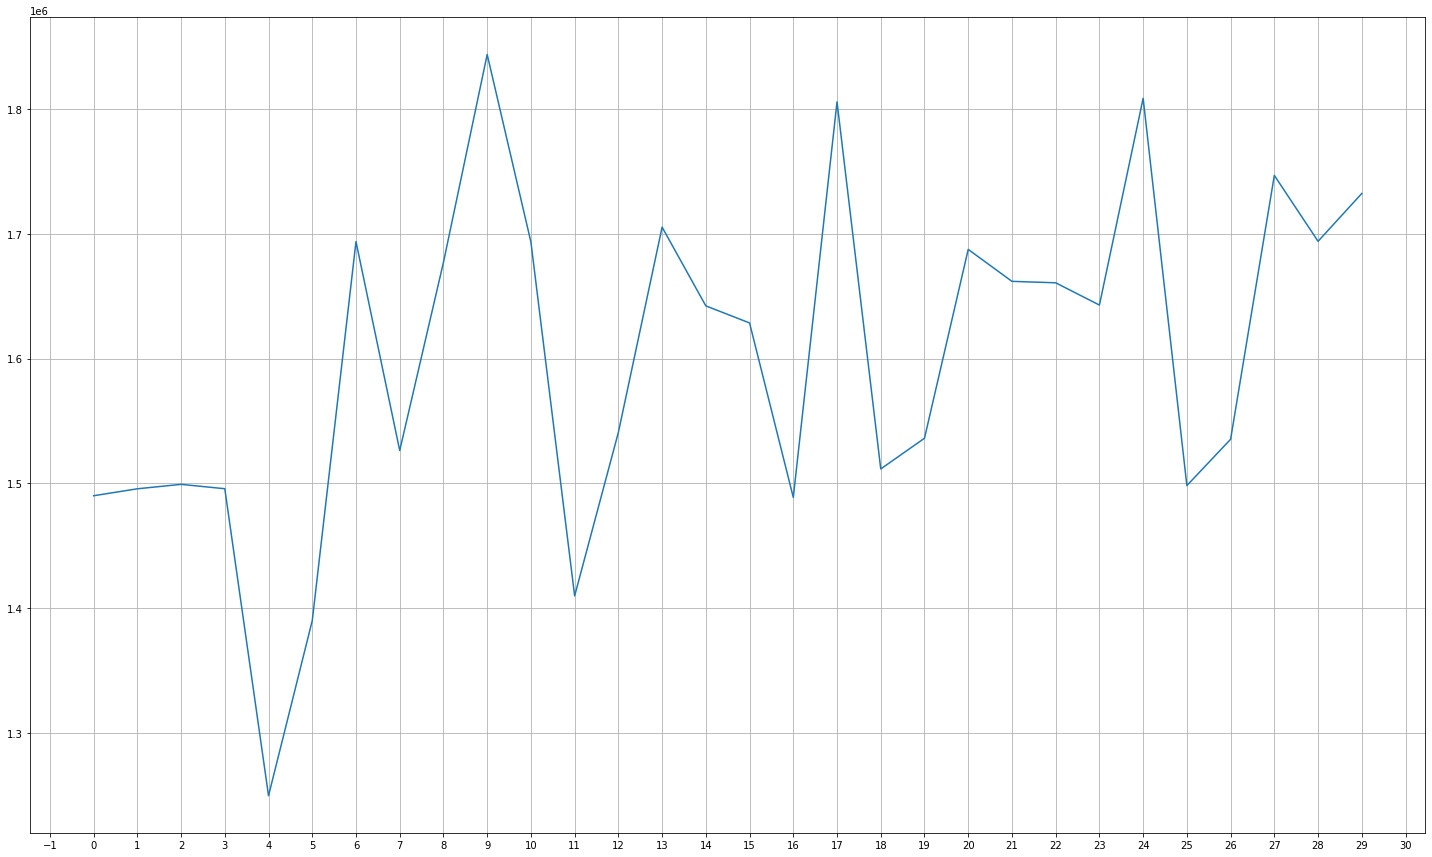

In [38]:
plt.figure(figsize=(25, 15))
plt.plot(np.arange(len(goods_per_day)), goods_per_day)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.show()

According to the plot representing total amount of goods bought by a specific day, we can observe local maximums at 9th, 17th and 24th days of month. 

If we assume that wage taking days are 2 days per month with 15 days interval (half a month), for example 10th and 25th, then we may notice the grouth of shopping frequency around wage taking days.


## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

### Frequent buyers

Text(0, 0.5, 'Orders')

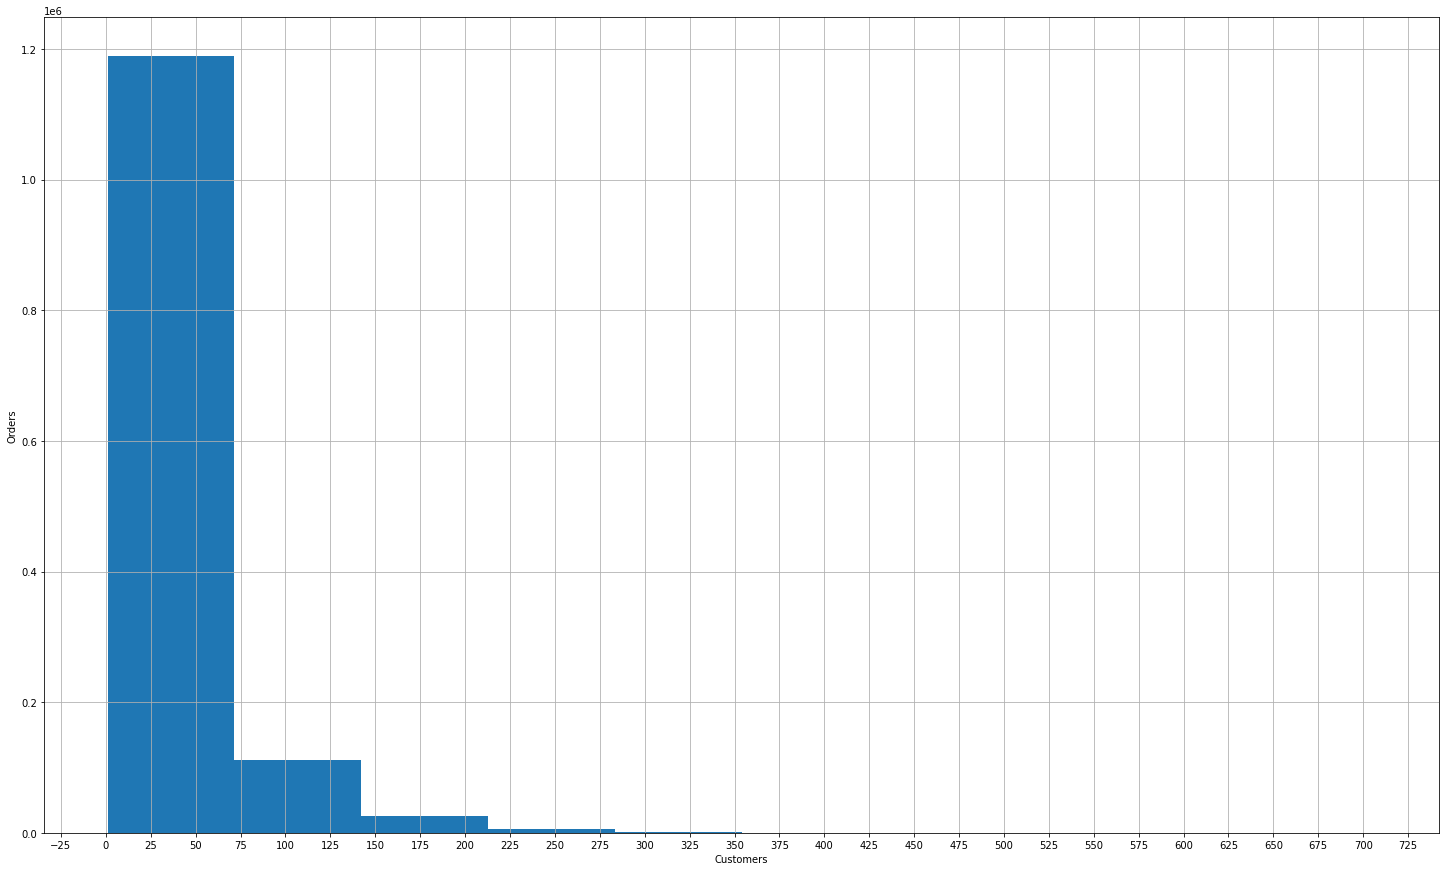

In [47]:
cnt_orders = df.groupby('id_card')['id_doc'].count()

plt.figure(figsize=(25, 15))
plt.hist(cnt_orders)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Customers')
plt.ylabel('Orders')

In [ ]:
frq_orders = 30 / cnt_orders[cnt_orders>0]
frq_orders.round()

plt.figure(figsize=(25, 15))
plt.hist(frq_orders)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Days between purchases')
plt.ylabel('Orders')

From the figure above we can see that most of the people buy goods every 1-3 days. Some people by every 3-6 days. Also, group with interval 6-15 days is observable. Some of the customers attend shopping nearly once a month. (27-30 days)

## Average purchase sum


In [ ]:
avg_ord_sum = df.groupby('id_card')['sum'].sum()

plt.figure(figsize=(25, 15))
plt.hist(avg_ord_sum)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Order sums')
plt.ylabel('Customers')

In [ ]:
avg_ord_sum = avg_ord_sum[avg_ord_sum<50000]

plt.figure(figsize=(25, 15))
plt.hist(avg_ord_sum)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Order sums')
plt.ylabel('Customers')

In [ ]:
avg_ord_sum = avg_ord_sum[avg_ord_sum<10000]

plt.figure(figsize=(25, 15))
plt.hist(avg_ord_sum)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Order sums')
plt.ylabel('Customers')

From the plots above, one may define plenty of groups. It would be correct to say that most of the customers make purshases in less than a 1000 roubles.

## Usual cart

In [ ]:
cnt_cust_per_group = df.groupby('id_group')['id_card'].unique().apply(len)

plt.figure(figsize=(25, 15))
plt.hist(cnt_cust_per_group)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Groups')
plt.ylabel('Customers')

cnt_cust_per_group.head()

In [ ]:
plt.figure(figsize=(25, 15))
plt.hist(cnt_cust_per_group[cnt_cust_per_group<3000])
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Groups')
plt.ylabel('Customers')

In [ ]:
cpg = cnt_cust_per_group.to_frame().rename(columns={'id_card':'occurences'})

intg = pg[pg['id_group'].isin(cpg.index)]
intg.drop_duplicates('id_group', 'first', inplace=True)
intg = intg.join(cpg, on='id_group')
intg.sort_values('occurences', ascending=False)
intg.head()

From the results above, one may observe that most popular group of goods are "Кисломолочные продукты" and "Творог"

Text(0, 0.5, 'Orders')

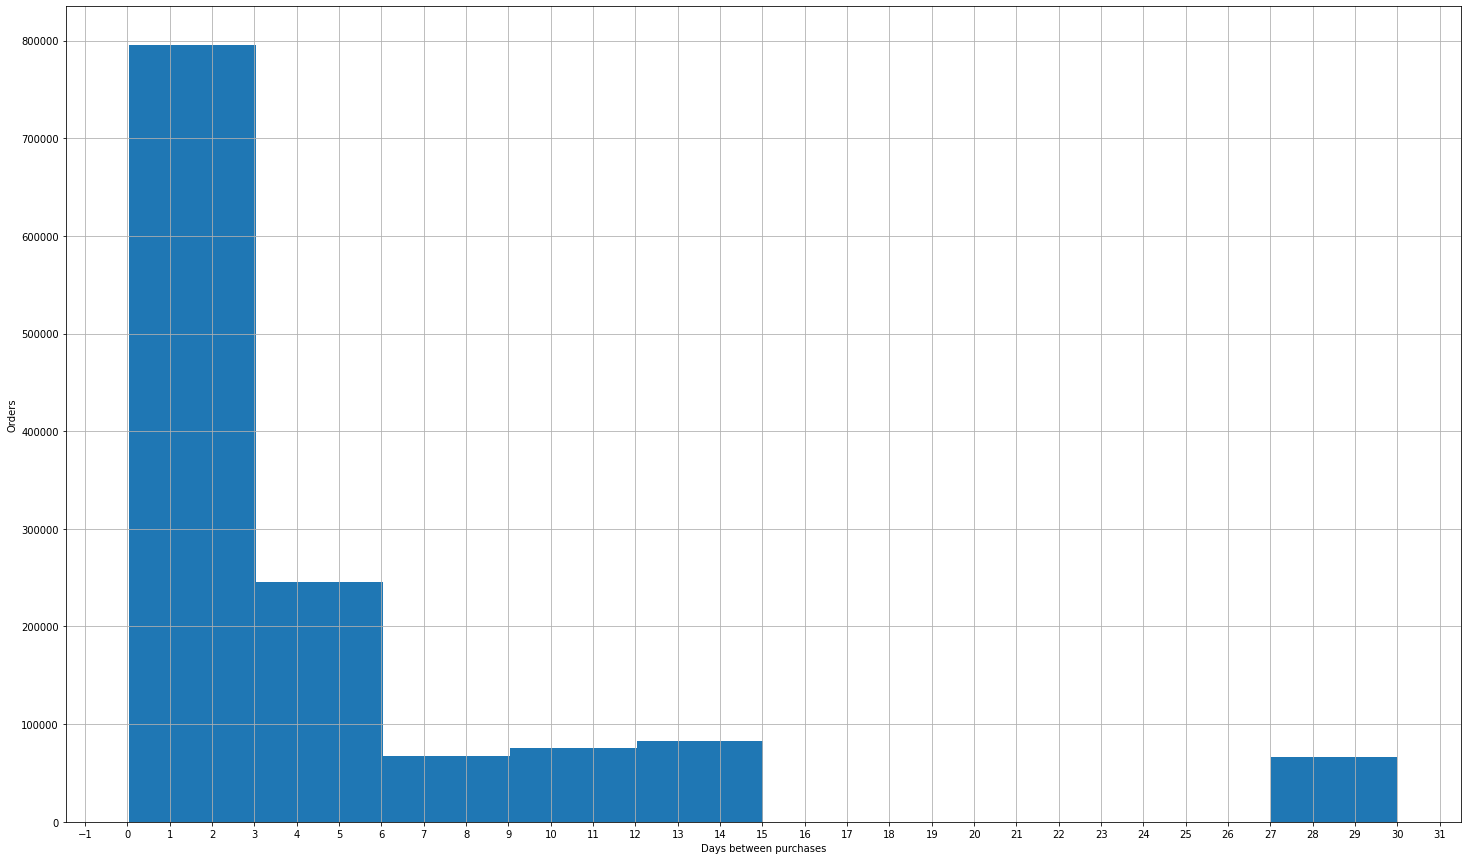

From the figure above we can see that most of the people buy goods every 1-3 days. Some people by every 3-6 days. Also, group with interval 6-15 days is observable. Some of the customers attend shopping nearly once a month. (27-30 days)

## Average purchase sum


Text(0, 0.5, 'Customers')

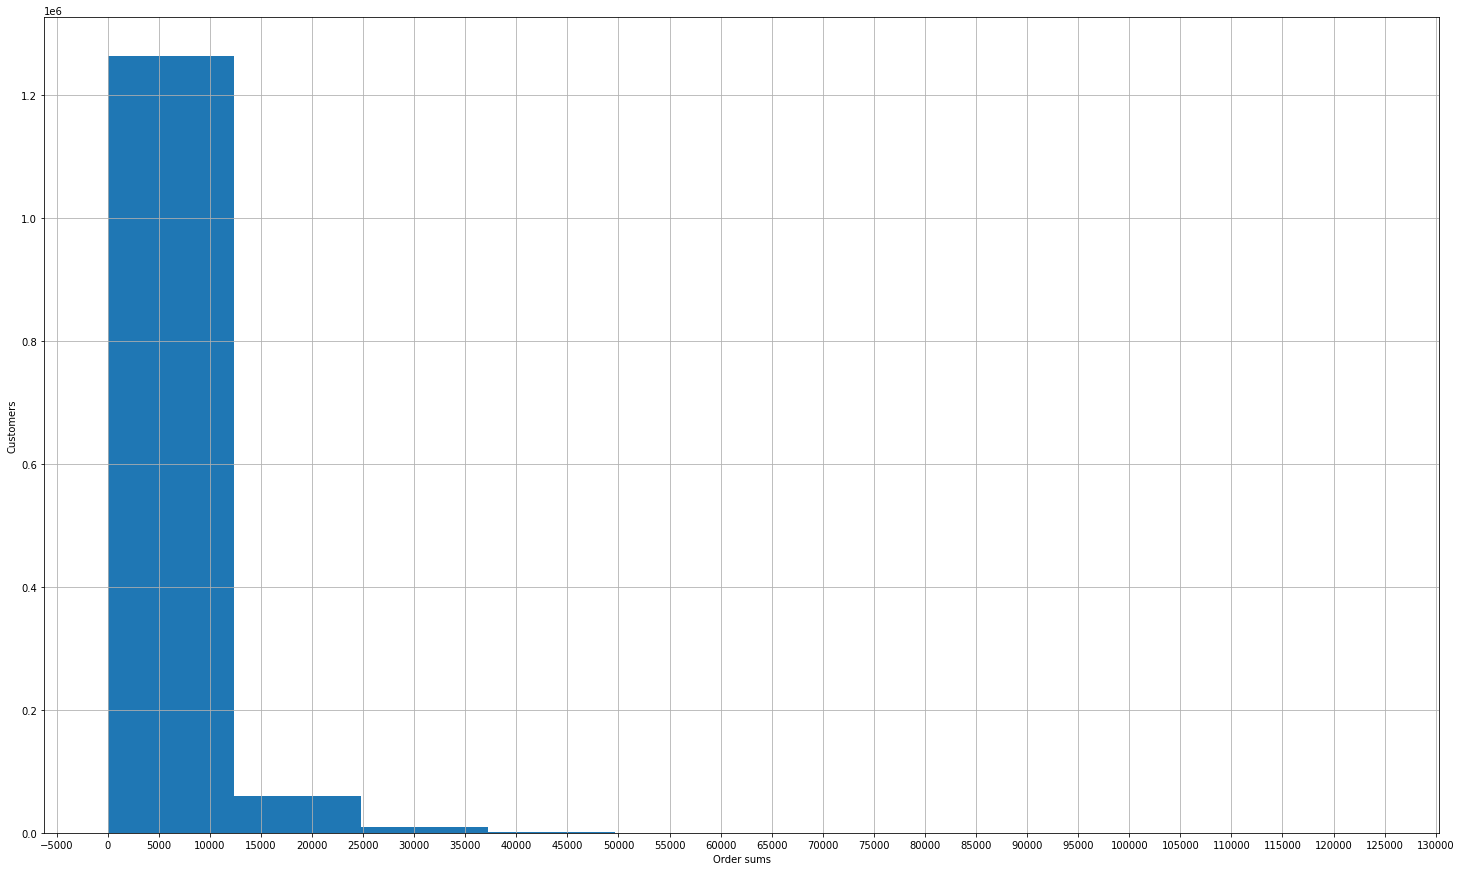

In [55]:
avg_ord_sum = df.groupby('id_card')['sum'].sum()

plt.figure(figsize=(25, 15))
plt.hist(avg_ord_sum)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Order sums')
plt.ylabel('Customers')

Text(0, 0.5, 'Customers')

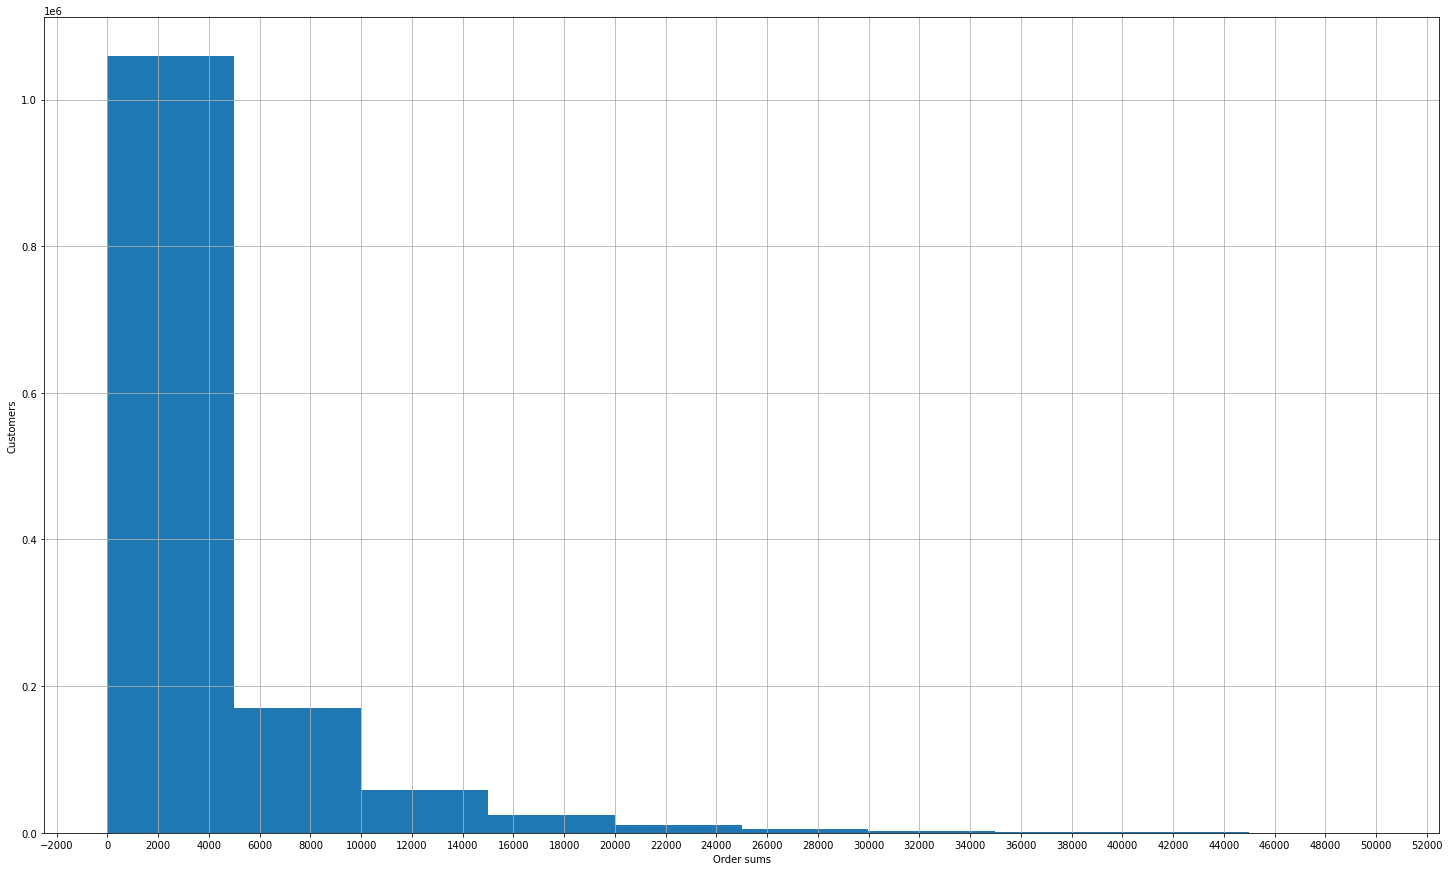

In [57]:
avg_ord_sum = avg_ord_sum[avg_ord_sum<50000]

plt.figure(figsize=(25, 15))
plt.hist(avg_ord_sum)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Order sums')
plt.ylabel('Customers')

Text(0, 0.5, 'Customers')

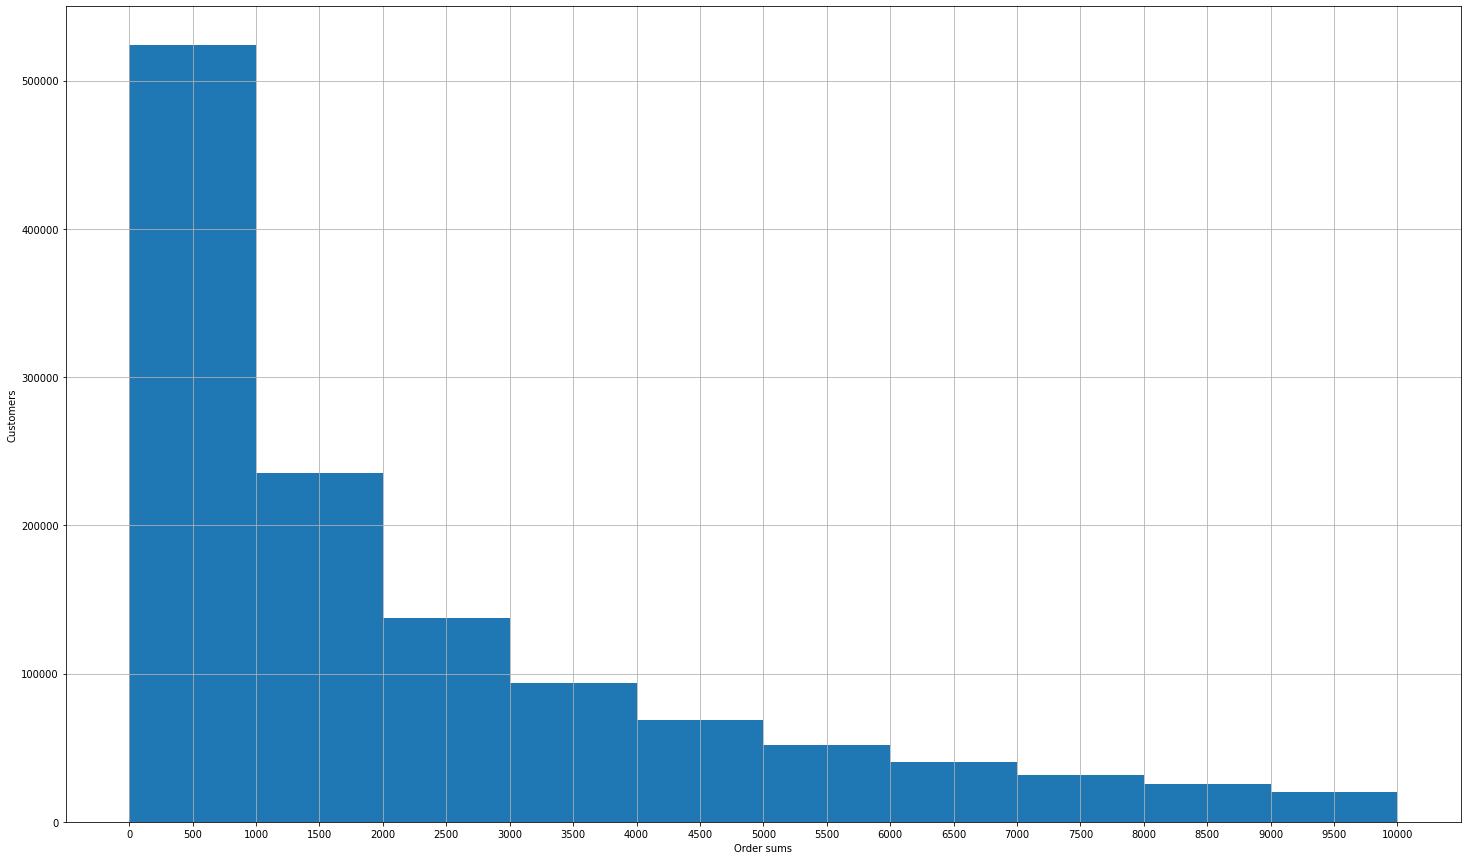

In [59]:
avg_ord_sum = avg_ord_sum[avg_ord_sum<10000]

plt.figure(figsize=(25, 15))
plt.hist(avg_ord_sum)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Order sums')
plt.ylabel('Customers')

From the plots above, one may define plenty of groups. It would be correct to say that most of the customers make purshases in less than a 1000 roubles.

## Usual cart

id_group
-9999     630883
 10004    513436
 10005    510511
 10008    335528
 10012    208897
Name: id_card, dtype: int64

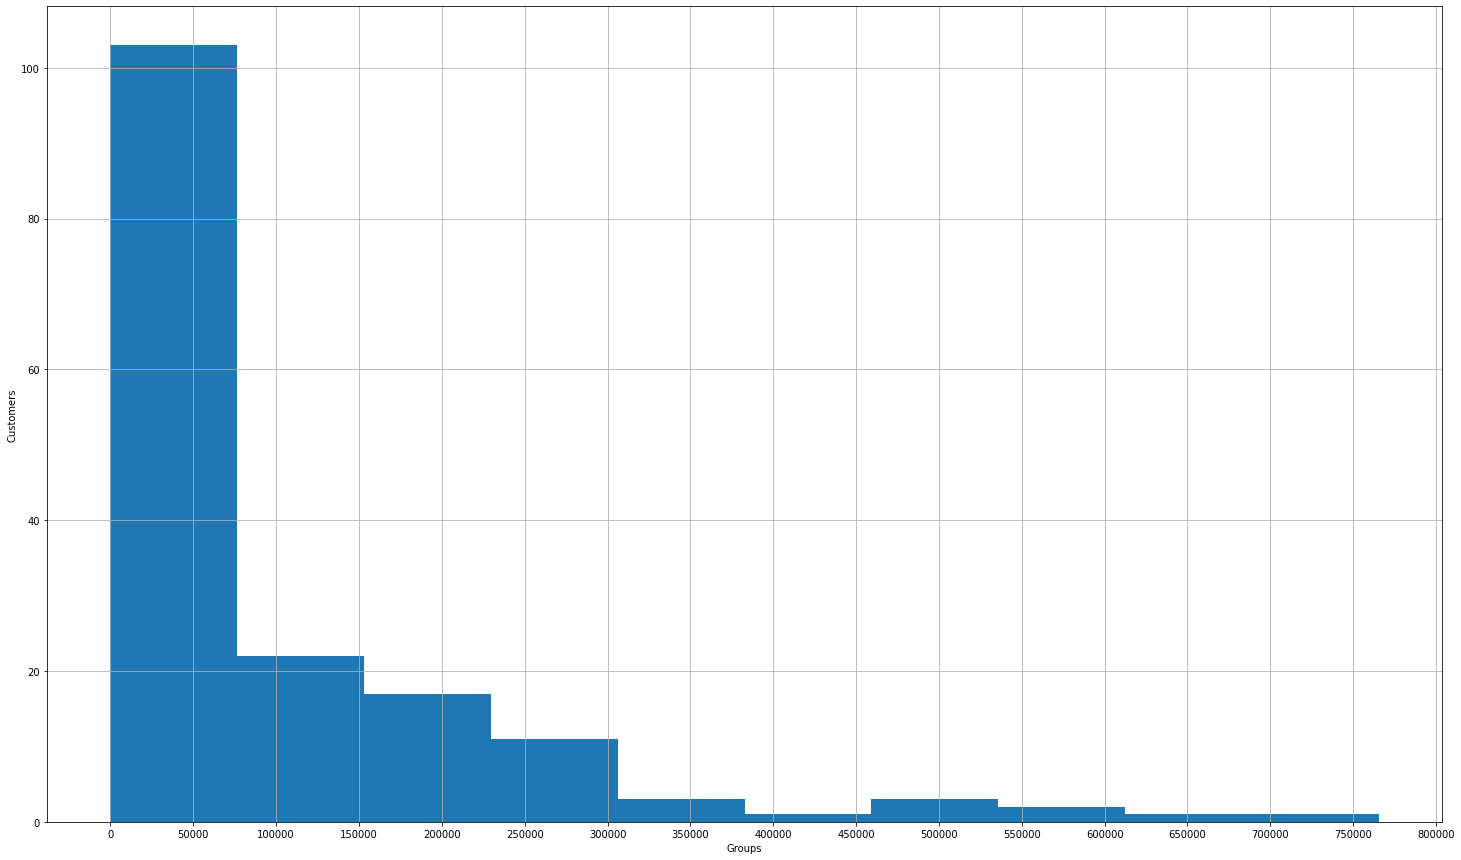

In [86]:
cnt_cust_per_group = df.groupby('id_group')['id_card'].unique().apply(len)

plt.figure(figsize=(25, 15))
plt.hist(cnt_cust_per_group)
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Groups')
plt.ylabel('Customers')

cnt_cust_per_group.head()

Text(0, 0.5, 'Customers')

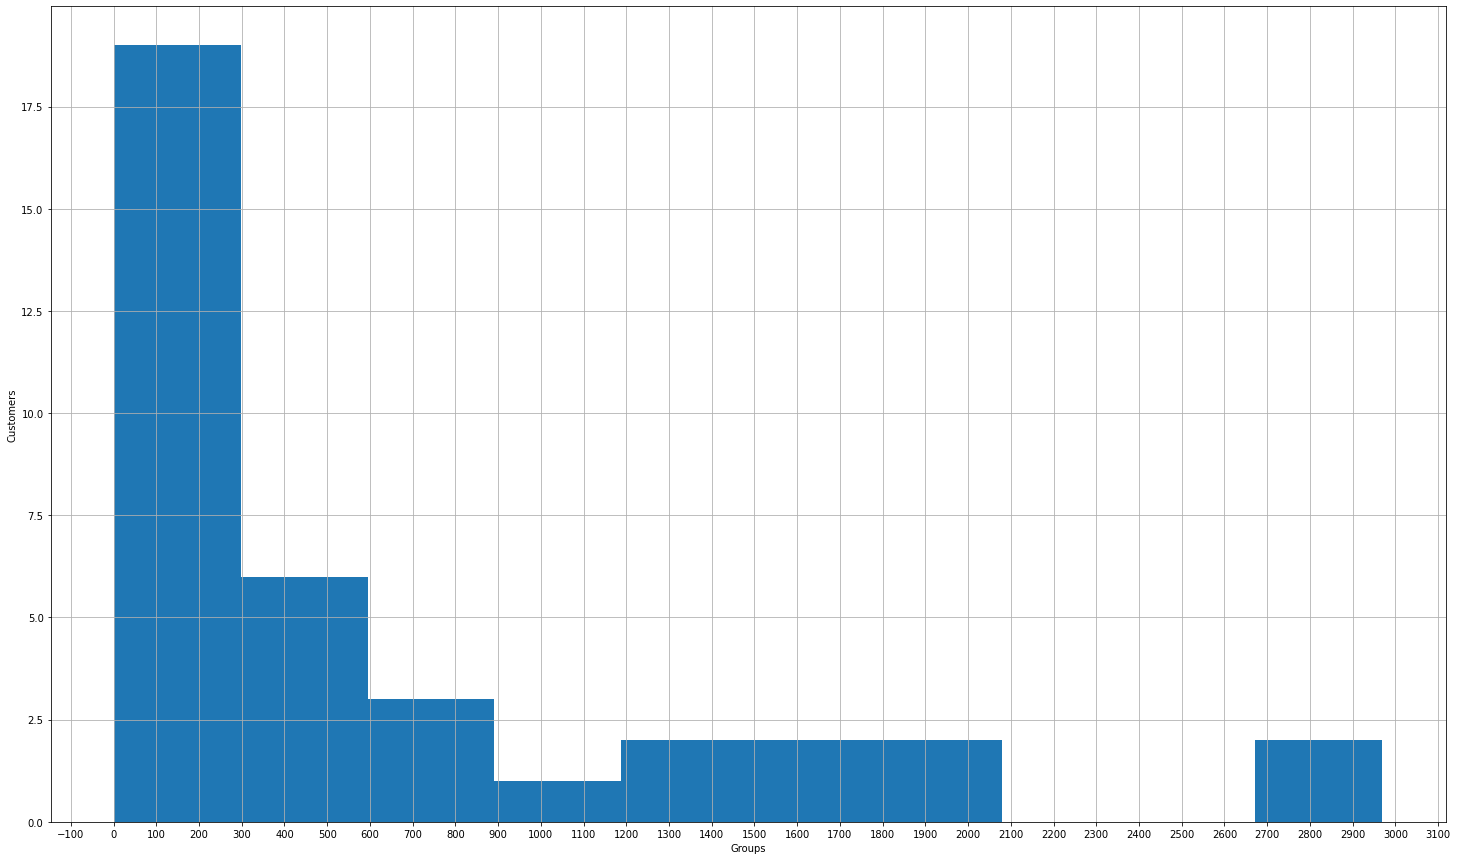

In [91]:
plt.figure(figsize=(25, 15))
plt.hist(cnt_cust_per_group[cnt_cust_per_group<3000])
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.xlabel('Groups')
plt.ylabel('Customers')

In [109]:
cpg = cnt_cust_per_group.to_frame().rename(columns={'id_card':'occurences'})

intg = pg[pg['id_group'].isin(cpg.index)]
intg.drop_duplicates('id_group', 'first', inplace=True)
intg = intg.join(cpg, on='id_group')
intg.sort_values('occurences', ascending=False)
intg.head()

<ipython-input-109-008462f096b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intg.drop_duplicates('id_group', 'first', inplace=True)


,id_tov,id_group,name_group,occurences
0,52,10004,Кисломолочные продукты,513436
43,91,10005,Творог,510511
93,848,10008,"Торты, пирожные, муссы, суфле",335528
191,781,10012,"Макароны, крупы, бобовые",208897
273,1115,10013,"Мюсли, сухие завтраки и обеды, каши",87205


From the results above, one may observe that most popular group of goods are "Кисломолочные продукты" and "Творог"